In [1]:
#!/usr/bin/env python3
import os
import re
import sys
print(sys.executable)
print(sys.path)
print(sys.version)

import collections
import argparse
#import tables
import itertools
import matplotlib
import glob
import math
%matplotlib inline

import scipy.io
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import scipy.sparse as sp_sparse
import scanpy as sc 
import scanpy.external as sce

from collections import defaultdict
from scipy import sparse, io

import scanpy.external as sce
import matplotlib

from scipy.sparse import csr_matrix
from multiprocessing import Pool
#from matplotlib_venn import venn2, venn2_circles
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

print('numpy', np.__version__)
print('pandas', pd.__version__)
print('scipy', scipy.__version__)
print('matplotlib', matplotlib.__version__)
print('scanpy', sc.__version__)

!date +%F

/home2/s426305/.conda/envs/py36/bin/python
['', '/cm/shared/apps/cnvkit/0.9.5/lib/python3.6/site-packages', '/cm/shared/apps/python/3.6.4-anaconda/lib', '/cm/shared/apps/jupyterkernel-matlab/0.16.1/lib/python3.6/site-packages', '/home2/s426305/.conda/envs/py36/lib/python36.zip', '/home2/s426305/.conda/envs/py36/lib/python3.6', '/home2/s426305/.conda/envs/py36/lib/python3.6/lib-dynload', '/home2/s426305/.local/lib/python3.6/site-packages', '/home2/s426305/.conda/envs/py36/lib/python3.6/site-packages', '/home2/s426305/.conda/envs/py36/lib/python3.6/site-packages/IPython/extensions', '/home2/s426305/.ipython']
3.6.7 | packaged by conda-forge | (default, Jul  2 2019, 02:18:42) 
[GCC 7.3.0]
numpy 1.16.1
pandas 0.25.1
scipy 1.1.0
matplotlib 3.3.3
scanpy 1.4
2021-10-12


In [2]:
sgRNA_lib_size = [200, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 12000, 14000, 16000, 18000, 20000, 25000, 30000]
sgRNA_per_cell = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]

In [3]:
pval_10 = pd.DataFrame(data=None, index=sgRNA_per_cell, columns=sgRNA_lib_size)
pval_25 = pd.DataFrame(data=None, index=sgRNA_per_cell, columns=sgRNA_lib_size)
pval_50 = pd.DataFrame(data=None, index=sgRNA_per_cell, columns=sgRNA_lib_size)
pval_75 = pd.DataFrame(data=None, index=sgRNA_per_cell, columns=sgRNA_lib_size)
pval_90 = pd.DataFrame(data=None, index=sgRNA_per_cell, columns=sgRNA_lib_size)

In [4]:
for i in pval_10.columns:
    for k in pval_10.index:
        pval = stats.hypergeom.sf(k*0.1 -1, i, k, k)
        pval_10.loc[k, i] = pval
        
for i in pval_25.columns:
    for k in pval_25.index:
        pval = stats.hypergeom.sf(k*0.25 -1, i, k, k)
        pval_25.loc[k, i] = pval

for i in pval_50.columns:
    for k in pval_50.index:
        pval = stats.hypergeom.sf(k*0.5 -1, i, k, k)
        pval_50.loc[k, i] = pval
        
for i in pval_75.columns:
    for k in pval_75.index:
        pval = stats.hypergeom.sf(k*0.75 -1, i, k, k)
        pval_75.loc[k, i] = pval
        
for i in pval_90.columns:
    for k in pval_90.index:
        pval = stats.hypergeom.sf(k*0.9 -1, i, k, k)
        pval_90.loc[k, i] = pval

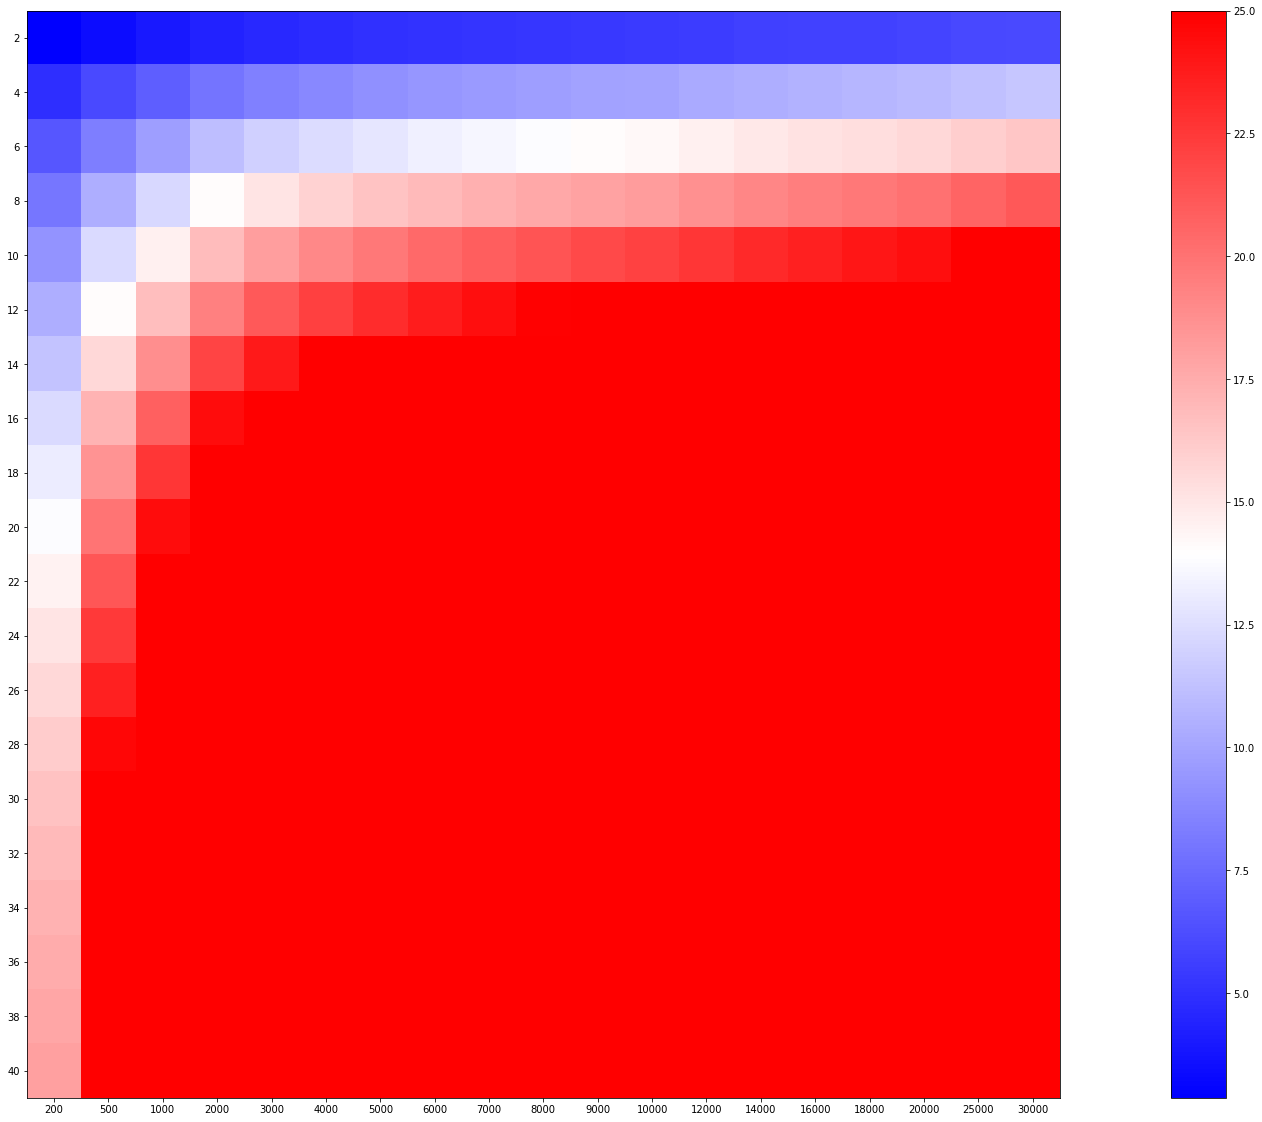

In [5]:
plot_df = pval_75
fig, ax = plt.subplots(figsize= (40, 20))

plt.imshow(-np.log10(plot_df.astype(float)), cmap='bwr', vmax=25)

plt.xticks(np.arange(0, len(plot_df.columns), 1), plot_df.columns)
plt.yticks(np.arange(0, len(plot_df.index), 1), plot_df.index)

plt.colorbar()
#plt.savefig('./Power_analysis_pval-75%.ver3.pdf')